**Project Start Date** <br>
17th December 2020 <br>

**Data Sources** <br>
https://www.kaggle.com/usaf/world-war-ii/notebooks <br> 
https://www.kaggle.com/smid80/weatherww2/data <br>

**Background** <br>
Aerial Bombing Operations in WW2 - Bombing operations data <br>

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

Weather Conditions in WW2 (Weather Stations / Weather Conditions) <br>
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

**Aim of this project** <br>
Implement a GLM model that predicts the maximum weather temperature (based on the minimum temperature)

**Analysis regarding Data Quality** <br>
Understanding of the sampling procedure 
- Since our project team did not participate in planning the study or data collection, it is possible that we are missing crucial context which could render our conclusions invalid. <br>

Potential biases <br> 
Real-world actions that generated the data you inherited <br>

**Objectives & Hypothesises to Test (max. 10)** <br>
<u>Exploratory Analysis</u>
- High level discriptive statistics 
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Assessment of feature distributions
- Assessment of feature relationships:
    - What defines the feature 'poor weather' conditions?
    - Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)?
    - It is expected that average temperatures are colder in winter months than summer months
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions)
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere)
    - It is expected that lower temperatures correlate with higher snowfall and precipation 
    - It is expected that higher levels above the sea have greater precipation
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)
<br>

**Statistical Model/Machine Learning Applications**
- Create a dummy model (Predict the average temperature for that monthly/quarter)
- Explain the train/test split
- Predict the maximum temperature given the minimum temperature (GLM Models & Bayesian Versions)?
- Explain appropriate error metric
- Explain class balance and any required action
- Explain what features are developed and transformations applied
- Explain if the model is exhibiting high bias or high variance and how this can be improved
    - Plot learning curves to deduce high bias/high variance and conclude what means could be applied to solve these issues
- Explain where the model seems to perform poorly - In what situations does the model make mistakes?

**Additional Learning notes from Reviewing 3 other Kaggle Notebooks** <br> 

**Next steps** <br>

**References**


In [53]:
import warnings
warnings.filterwarnings('ignore')

# Package Requirements
import os
import sys
!{sys.executable} -m pip install markdown
!{sys.executable} -m pip install sweetviz
!{sys.executable} -m pip install joypy

You should consider upgrading via the '/anaconda3/bin/python3 -m pip install --upgrade pip' command.
  Using cached sweetviz-2.0.4-py3-none-any.whl (15.1 MB)
You should consider upgrading via the '/anaconda3/bin/python3 -m pip install --upgrade pip' command.
  Using cached joypy-0.2.4-py2.py3-none-any.whl (8.4 kB)
You should consider upgrading via the '/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [56]:
# Data Wrangling
import pandas as pd
import numpy as np
import datetime 

# Data Exploration and Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import joypy

In [3]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/RegressionModels/notebooks'

In [4]:
aerial_bombing_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/ww2_boming_operations.csv')
weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherTempPrediction.csv')
weather_station_location = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherStationLocations.csv')

data_list = []
data_list.append(aerial_bombing_data)
data_list.append(weather_summary)
data_list.append(weather_station_location)

In [5]:
# State the assumptions you’re being forced to make.
# Write up caveat notes to be included in the appendix of your final report
# Write cautionary notes that warn the decision-maker (and your other readers) that conclusions from the study will 
# need to be downgraded due to potential data issues

In [6]:
for i in data_list:
    print("Dataframe Dimensions")
    print(i.shape)
    print("")

    print("Dataframe Columns and respective types")
    print(i.dtypes)
    print("")

    print("Percentage of Missing Data")
    print(i.isnull().sum() * 100 / len(i))
    
    print("")

Dataframe Dimensions
(178281, 46)

Dataframe Columns and respective types
Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           ob

## Data Analysis
- Data visualization of features
- Handling categorical data
- Normalization and standardization of features
- Dimensionality Reduction

In [7]:
# Investiage options to link the dataframes with a unique key: weather_summary and weather_station_location look to be 
# connected via STA and WBAN respectively 
def uncommon_elements(list1, list2):
    ## Add something clever so the look up is always against the set with the largest number of unique records
    
    return [element for element in list2 if element not in list1]

STA = set(weather_summary.STA)
print(len(STA))

WBAN = set(weather_station_location.WBAN)
print(len(WBAN))

print('Sets are of the same data type: ', type(weather_summary.STA) == type(weather_station_location.WBAN))

print('Stations that are uncommon across both sets: ', uncommon_elements(STA, WBAN))

159
161
Sets are of the same data type:  True
Stations that are uncommon across both sets:  [15605, 15604]


In [8]:
combined_data = pd.merge(weather_summary, 
                         weather_station_location, 
                         how = 'inner', # takes care of only keeping records in both sets
                         left_on='STA',
                         right_on='WBAN')

print(len(combined_data))

119040


## Columns for Combined Data
**STA**
- STA: represent the Weather Station
- Not all STA codes represent the same time frequency 

**Date** 
- Date has been split into DA MO and YR respectively, note the century has been dropped when recording the YR

**Precip** 
- Precipitation in mm. This consists of numerical values and 'T' for 16,754 entries. This looks to be a mistake in the data collection (Impute precip == 0 for these cases)

**MaxTemp and MinTemp** 
- These are features that have been transformed into celcius from fahrenheit readings MAX/MIN and these have been recorded to 6 decimal places. The degrees celcius value has additionally been converted to an average. Using celcius will have a smaller range than the fahrenheit records. Patterns may be more easily seen based fahrenheit columns 

**MEA** 
- This is the mean for the fahrenheit MAX / MIN columns and this has been rounded to 1 d.p. Drop this columns and calculate the extact mean value

**Snowfall**
- This looks to be measures in terms of the amount of snow that fell in mm. The units are not obvious so there are two options
- Either assume the units are centiments by attempting to research more about the data OR normalise all the columns so they are on the same scale

**SNF**
 - After research it is unclear what SNF relates too and seems to gave a range of 0 - 3.4 (Agree to remove)

**PRCP**
- This column looks to have been scaled by a factor of 1/25.4*Precip (Agree to remove)

**TSHDSBRSGF**
- This is a repeat for PoorWeather so can be removed

**WBAN**
- Same as STA, representing the Weather Station
- Not all Weather Stations are located in the USA (unique STATE/COUNTRY ID = 63)
- This will be duplicated due to the merge so can be removed 

**NAME**
- This is the name of the weather station. It has a many:1 relationship with State/Country ID i.e. more than one station can be present per country 

**STATE/COUNTRY ID**
- This is the location of the weather station at state/country level

**LAT**
- This is the decimal latitude in string format 

**LON**
- This is the decimal latitude in string format 

**ELEV**
- Explanation not given - Expected to be level above the sea 
- Note that an elevation of 9999 means unknown

**Latitude**
- This is the decimal latitude calculated from the LAT/LON provided (use this over string as in format for ML)

**Longitude**
- This is the decimal longitude calculated from the LAT/LON provided (use this over string as in format for ML)

### Data Cleaning - Remove duplicate Rows & Columns
- Remove all columns that exhibit over 90% missing values
- Remove celcius columns 'MaxTemp', 'MinTemp', 'MeanTemp' and 'MEA'
- Remove duplicated/scaled columns: 'PRCP', 'TSHDSBRSGF'
- Remove PoorWeather for the inital analysis as unclear how the data has been recorded 
- Remove LAT as string format
- Remove LON as string format
- Remove those columns with zero variance
- Remove duplicated rows

In [9]:
# Handling missing data - Remove any columns with over 90% missing data 
def remove_missing_values(data, thresold_limit = 0.9):
    
    return data.loc[:, data.isnull().sum() < thresold_limit*data.shape[0]]

combined_data = remove_missing_values(combined_data)

# Remove additional columns based on explanation above
combined_data.drop(['MaxTemp', 
                    'MinTemp', 
                    'MeanTemp', 
                    'MEA', 
                    #'PoorWeather', 
                    'TSHDSBRSGF', 
                    'PRCP', 
                    'SNF', 
                    'WBAN',
                    'LAT', 
                    'LON'], axis=1, inplace=True)

# Data Quality Expectations: Test for zero variance 
combined_data = combined_data.loc[:, combined_data.apply(pd.Series.nunique) != 1]

# Data Quality Expectations: Duplicated Records
print('Duplicated rows for index: ', combined_data[combined_data.duplicated()].index)
#print(len(combined_data))
combined_data = combined_data.drop_duplicates()
#print(len(combined_data))

Duplicated rows for index:  Int64Index([94660, 94661, 94662, 94663, 94664, 94665, 94666, 94667, 94668,
            94669],
           dtype='int64')


## Data Cleaning

### Correct Data Types

In [62]:
# Correct Date
def correct_dates(data, cols):
    
    return pd.to_datetime(combined_data[cols], format = '%Y-%m-%d')

# Correct Object Types
def correct_objects(data, cols):
    
    return data[cols].astype('object')

# Correct String Types
def correct_string(data, cols):
    
    return data[cols].astype(str)

combined_data.Date = correct_dates(combined_data, 'Date')

combined_data.STA = correct_objects(combined_data, 'STA')
combined_data.YR = correct_objects(combined_data, 'YR')
combined_data.MO = correct_objects(combined_data, 'MO')
combined_data.DA = correct_objects(combined_data, 'DA')

combined_data.Snowfall = correct_string(combined_data, 'Snowfall')
combined_data.PoorWeather = correct_string(combined_data, 'PoorWeather')

### Imputation of Missing Values

In [11]:
# Deal with Missing/Inaccurate values and correct data types 
def impute_missing_values(data, cols):
    
    return np.where((data[cols] == 'T') | (data[cols] == ' '), 0, data[cols])

# Correct float types
def correct_floats(data, cols):
    
    return data[cols].astype('float')

combined_data.Precip = impute_missing_values(combined_data, 'Precip')
combined_data.Precip = correct_floats(combined_data, 'Precip')

### Linear Combination Check

In [12]:
combined_data.corr()

,Precip,MAX,MIN,ELEV,Latitude,Longitude
Precip,1.000000,0.004344,0.091853,0.081245,-0.102463,0.008911
MAX,0.004344,1.000000,0.873746,0.043020,-0.554495,0.044037
MIN,0.091853,0.873746,1.000000,0.060584,-0.601646,-0.089951
ELEV,0.081245,0.043020,0.060584,1.000000,-0.068933,0.000039
Latitude,-0.102463,-0.554495,-0.601646,-0.068933,1.000000,-0.129665
Longitude,0.008911,0.044037,-0.089951,0.000039,-0.129665,1.000000


<AxesSubplot:>

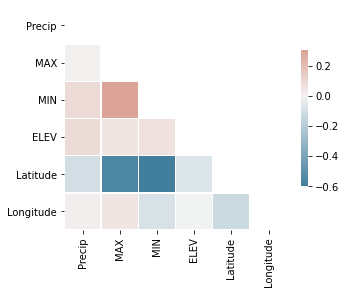

In [13]:
# Compute the correlation matrix
corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Exploratory Data Analysis 
**Hypothesis & Expectations to Test**
- Is this a Global study? What are the locations associated with the experiment? [x]
- High level discriptive statistics [x]
- Assessment of feature distributions [x]
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Assessment of feature relationships:
    - It is expected that average temperatures are colder in winter months than summer months
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions)
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere)
    - It is expected that lower temperatures correlate with higher snowfall and precipation 
    - It is expected that higher levels above the sea have greater precipation
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)
- Time Series Analysis (max. 3 graphs/analyses)

**References** <br>
https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34 <br>
https://towardsdatascience.com/pandas-profiling-sweetviz-8849704cadd7 <br>
https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052 <br>
https://towardsdatascience.com/all-you-want-to-know-about-preprocessing-data-preparation-b6c2866071d4 <br>

In [21]:
combined_data.NAME.unique()

array(['ACCRA', 'CAPE PALMAS', 'FISHERMANS LAKE',
       'MARSHALL/ROBERTS FIELD', 'GEORGETOWN', 'CLEVELANDIA',
       'BALBOA/ALBROOK', 'REY ISLAND', 'JAQUE', 'HOWARD', 'FORT KOBBE',
       'POCRI', 'RIO HATO', 'DAVID', 'SAN JOSE', 'PARRITA',
       'DAKAR/EKNES FIELD', 'DAKAR/MALLARD FIELD', 'CHRISTS CHURCH',
       'ST LUCIA/ISLAND', 'ST JOHNS/COOLIDGE FIELD', 'WILLEMSTAD',
       'WALLER/BWI', 'CIUDAD TRUJILLO', 'PORT AU PRINCE', 'KINGSTON',
       'MERCEDES', 'GUATEMALA CITY', 'TINDOUF', 'ATAR', 'CAMAGUEY',
       'SOUTH CAICOS ISLAND', 'GREAT EXUMA ISLAND', 'SAN ANTONIO',
       'CASABLANCA/CAZES FIELD', 'MARRAKECH', 'OUJDA', 'TOUAHAR', 'LAJES',
       'BERMUDA', 'WARRINGTON', 'CAMP DELTA', 'KEFLAVIK', 'REYKJAVIK',
       'NARSARSSUAK', 'SIMIUTAK', 'SONDRESTROM', 'CHRISTMAS ISLAND/AAF',
       'PALMYRA ISLAND/LINE ISLANDS', 'LYMAN FIELD/AAF', 'MOLOKAI/AP 524',
       'HICKAM/AFB', 'MOKULEIA FIELD/AAF', 'WHEELER/AFB 810.1',
       'BURNS FIELD/AAF', 'APAPA', 'KANO', 'MAIDUGURI', '

In [63]:
my_report = sv.analyze(combined_data)
my_report.show_html()




Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
combined_data.describe()

,Precip,MAX,MIN,ELEV,Latitude,Longitude
count,119030.000000,118556.000000,118562.000000,119030.000000,119030.000000,119030.000000
mean,3.225847,81.002750,64.273713,416.409737,17.551334,-15.789623
std,10.801465,14.869516,14.482087,1696.721101,19.763202,88.767738
min,0.000000,-28.000000,-37.000000,1.000000,-27.600000,-175.000000
25%,0.000000,78.000000,59.000000,9.000000,6.750000,-79.500000
50%,0.000000,85.000000,70.000000,26.000000,17.900000,-22.616667
75%,0.762000,89.000000,74.000000,93.000000,27.683333,44.866667
max,307.340000,122.000000,94.000000,9999.000000,67.016667,177.366667


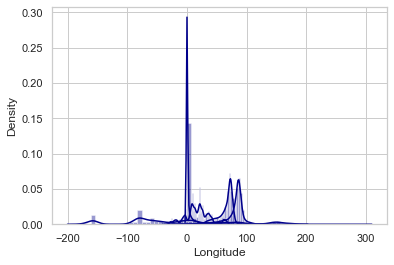

In [43]:
# Density Plots for Numerical Columns
numeric_columns = combined_data.select_dtypes(include=['float64']).columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(7,7))

for i in numeric_columns:
    sns.distplot(combined_data[i], hist=True, kde=True, color = 'darkblue', title=i)

plt.tight_layout()
plt.show()
plt.clf()
plt.close()

In [80]:
object_columns = combined_data.select_dtypes(include=['object']).columns
object_columns[1]

'Snowfall'

<AxesSubplot:>

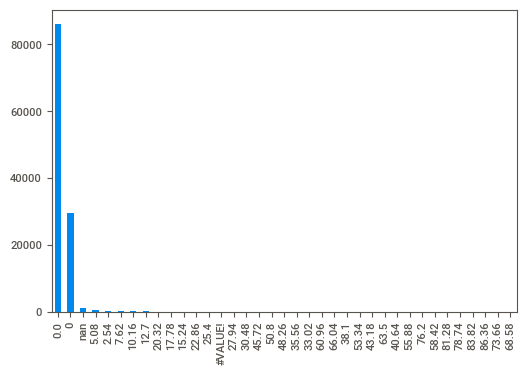

In [81]:
combined_data['Snowfall'].value_counts().plot(kind='bar')

In [85]:
object_columns[1:]

Index(['Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'NAME',
       'STATE/COUNTRY ID'],
      dtype='object')

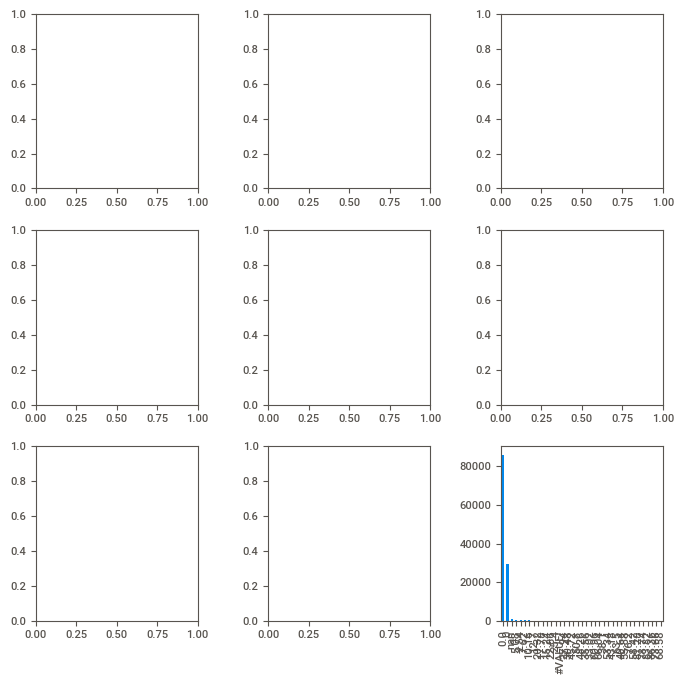

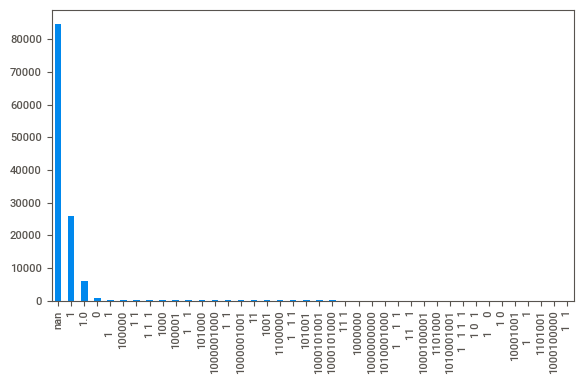

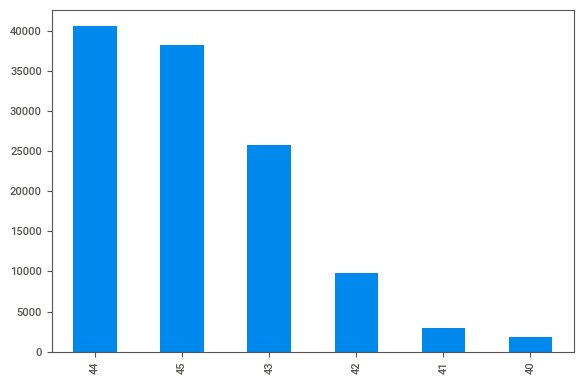

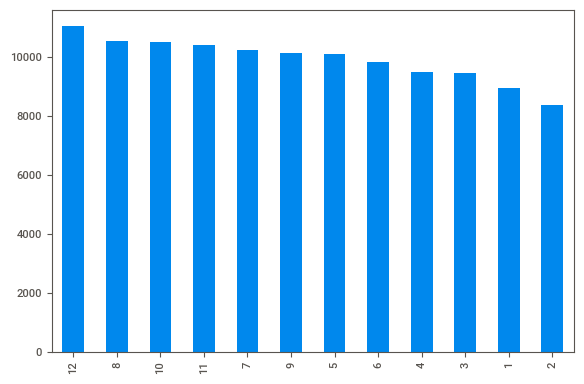

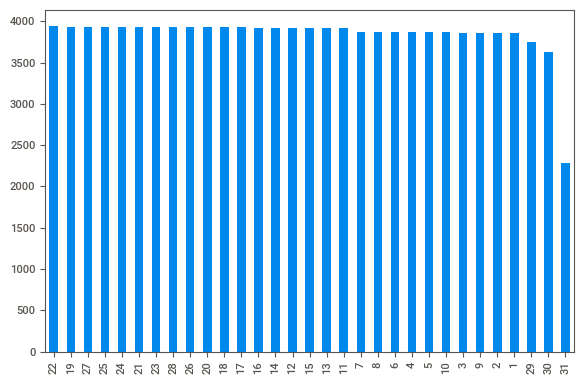

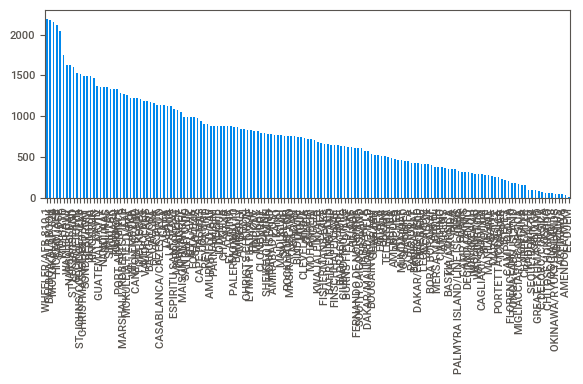

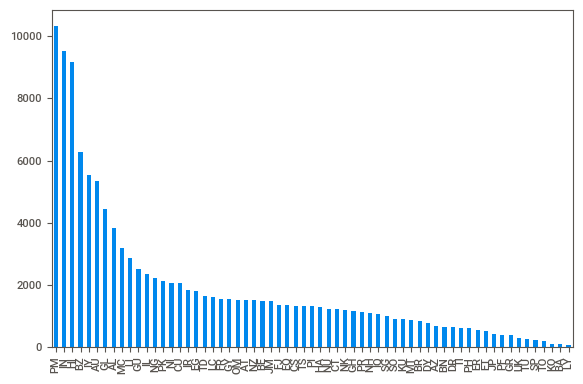

In [87]:
# Barplots for Categorical Data
object_columns = combined_data.select_dtypes(include=['object']).columns
object_columns = object_columns[1:] #  Cannot plot STA

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(7,7))

for i in object_columns:
    combined_data[i].value_counts().plot(kind='bar')
    
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.close()

In [66]:
object_columns.columns

Index(['STA', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'NAME',
       'STATE/COUNTRY ID'],
      dtype='object')

In [37]:
pd.crosstab(combined_data.YR, combined_data.MO)

MO,1,2,3,4,5,6,7,8,9,10,11,12
YR,,,,,,,,,,,,
40,93,144,155,150,155,150,155,155,150,155,157,146
41,178,163,181,180,150,147,184,276,327,348,394,455
42,474,429,478,569,670,660,883,944,1029,1145,1183,1361
43,1476,1371,1604,1680,2039,2096,2193,2518,2455,2628,2686,2984
44,3144,3073,3322,3297,3425,3419,3549,3513,3340,3514,3406,3525
45,3574,3176,3707,3631,3659,3355,3271,3141,2821,2711,2582,2572


In [11]:
pd.crosstab(combined_data['NAME'], combined_data['STATE/COUNTRY ID'])

STATE/COUNTRY ID,AL,AT,AU,AZ,BA,BE,BN,BR,BZ,CS,...,PR,SG,SO,SP,TD,TI,TO,TS,TU,UK
NAME,,,,,,,,,,,,,,,,,,,,,
ABADAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACCRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,263,0
AGRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIN EL,383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLER/BWI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1631,0,0,0,0,0
WARRINGTON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,295
WHEELER/AFB 810.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Write clean data to 02_intermediate data folder
#weather_summary.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/data_cleaning.csv')

### Data Cleaning - Feature Engineering
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 

In [13]:
#weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/data_cleaning.csv')

In [14]:
# Calculate the average based on the fahrenheit columns
weather_summary['MeanTemp_F'] = (weather_summary['MAX'] + weather_summary['MIN'])/2

# Create a simplier binary feature for snowfall occurrence
weather_summary['Snowfall_bin'] =  np.where(weather_summary.Snowfall.isnull(), 0, 1)

# Add full state names to the analysis

STATES_TUPLE = [("AL","Alabama"),
                ("AK","Alaska"),
                ("AZ","Arizona"),
                ("AR","Arkansas"),
                ("CA", "California"),
                ("CO", "Colorado"),
                ("CT","Connecticut"),
                ("DC","Washington DC"),
                ("DE","Delaware"),
                ("FL","Florida"),
                ("GA","Georgia"),
                ("HI","Hawaii"),
                ("ID","Idaho"),
                ("IL","Illinois"),
                ("IN","Indiana"),
                ("IA","Iowa"),
                ("KS","Kansas"),
                ("KY","Kentucky"),
                ("LA","Louisiana"),
                ("ME","Maine"),
                ("MD","Maryland"),
                ("MA","Massachusetts"),
                ("MI","Michigan"),
                ("MN","Minnesota"),
                ("MS","Mississippi"),
                ("MO","Missouri"),
                ("MT","Montana"),
                ("NE","Nebraska"),
                ("NV","Nevada"),
                ("NH","New Hampshire"),
                ("NJ","New Jersey"),
                ("NM","New Mexico"),
                ("NY","New York"),
                ("NC","North Carolina"),
                ("ND","North Dakota"),
                ("OH","Ohio"),
                ("OK","Oklahoma"),
                ("OR","Oregon"),
                ("PA","Pennsylvania"),
                ("RI","Rhode Island"),
                ("SC","South Carolina"),
                ("SD","South Dakota"),
                ("TN","Tennessee"),
                ("TX","Texas"),
                ("UT","Utah"),
                ("VT","Vermont"),
                ("VA","Virginia"),
                ("WA","Washington"),
                ("WV","West Virginia"),
                ("WI","Wisconsin"),
                ("WY","Wyoming")]


# Add sine and cos features for seasonal elements 

In [15]:
# Write clean data to 02_intermediate data folder
weather_summary.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_std_feature_eng.csv')

# Save the features to a pickle file


#weather_summary_tm.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_tm_feature_eng.csv')

<AxesSubplot:>

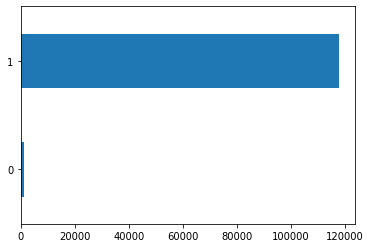

In [16]:
weather_summary['Snowfall_bin'].value_counts().sort_values().plot(kind = 'barh')

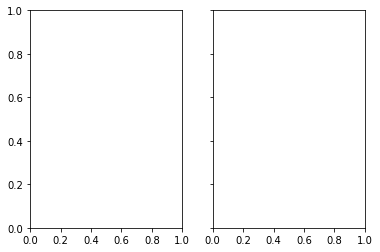

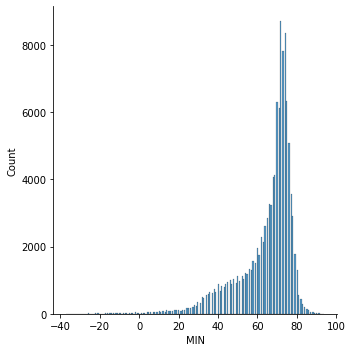

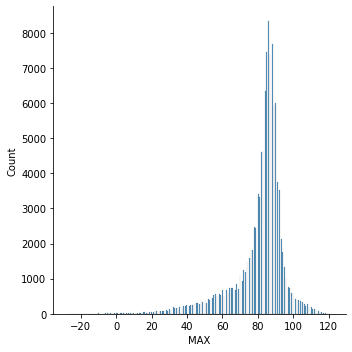

In [17]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.displot(weather_summary, x="MIN", ax=ax1)
sns.displot(weather_summary, x="MAX", ax=ax2)

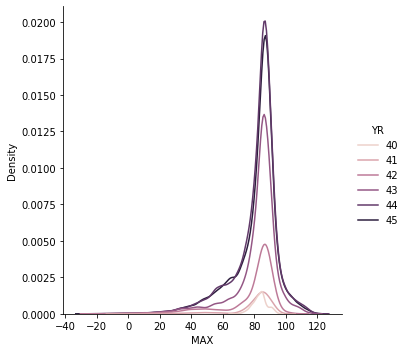

In [18]:
sns.displot(weather_summary, x="MAX", hue="YR", kind="kde")

In [19]:
weather_summary[weather_summary['STA'] == 10001]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,MeanTemp_F,Snowfall_bin
0,10001,1942-07-01,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1
1,10001,1942-07-02,0.000,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.5,1
2,10001,1942-07-03,2.540,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
3,10001,1942-07-04,2.540,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1
4,10001,1942-07-05,0.000,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,10001,1945-08-27,0.000,NaN,28.333333,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,1
1153,10001,1945-08-28,13.970,NaN,27.222222,22.222222,24.444444,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,76.5,1
1154,10001,1945-08-29,3.048,NaN,26.111111,22.222222,24.444444,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,75.5,1
1155,10001,1945-08-30,0.000,NaN,27.777778,22.777778,25.555556,0,1,45,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,77.5,1


**Data Analysis & Visualization of features**
- Timeseries Dataframe: weather_summary_tm

In [20]:
## Sort the data into date order and reset index
## Create a new timeseries dataframe 
weather_summary.set_index('Date', drop=True, inplace=True)
weather_summary

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,MeanTemp_F,Snowfall_bin
Date,,,,,,,,,,,,,,,,,,,,,
1942-07-01,10001,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1
1942-07-02,10001,0.000,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.5,1
1942-07-03,10001,2.540,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
1942-07-04,10001,2.540,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1
1942-07-05,10001,0.000,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-12-27,82506,0.000,NaN,28.333333,18.333333,23.333333,0,NaN,45,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,1
1945-12-28,82506,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,75.0,1
1945-12-29,82506,0.000,NaN,28.333333,18.333333,23.333333,0,1,45,12,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,74.0,1


In [21]:
# Annual Analysis


In [22]:
# Monthly Analysis


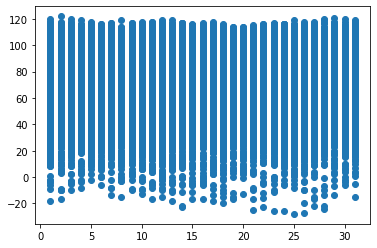

In [23]:
# Daily Analysis
plt.scatter(weather_summary.DA, weather_summary.MAX)

In [24]:
# ## TimeSeries Analysis 
# sns.lineplot(x='Date', 
#              y='MIN', 
#              data=weather_summarytrans, 
#              hue='STA'); # ';' is to avoid extra message before plot

### Weather Location Analysis

**Hypothesis & Expectations to Test**
- What are the locations associated with the study?


In [25]:
initial_min_temperature = Data.loc[0, 'Average Tank Temperature (deg F)']
initial_max_temperature = Data.loc[0, 'Average Tank Temperature (deg F)']

final_min_temperature = Data.loc[Data.index.max(), 'Average Tank Temperature (deg F)']
final_max_temperature = Data.loc[Data.index.max(), 'Average Tank Temperature (deg F)']

min_temperature = Data['T_Amb (deg F)'].min()
max_temperature = Data['T_Amb (deg F)'].max()

min_temperature_sd = Data['T_Amb (deg F)'].sd()
max_temperature_sd = Data['T_Amb (deg F)'].sd()

min_temperature_avg = Data['T_Amb (deg F)'].mean()
max_temperature_avg = Data['T_Amb (deg F)'].mean()

min_temperature_median
max_temperature_median

min_temperature_mode
max_temperature_mode

NameError: name 'Data' is not defined

## Model Building 
- Data partitioning into training, validation and testing sets (set seed)
    - Ensure that the range of the test is within the range of the train 
- Select the model that you would like to use
- Hyperparameter tuning is used to fine-tune the model in order to prevent overfitting 
- Cross-validation is performed to ensure the model performs well on the validation set 
- Model is applied to the test data set
- Save the trained model to a pickle file
- Create a learning curve
- Assess model bias and variance to deduce model improvement next steps

In [ ]:
# Compare the distribution between the train and test dataset
my_report = sv.compare_intra(combined_data, combined_data[""] == 'male', ["Male", "Female"], 'Survived')
my_report.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

## Error Handling Scripts

In [ ]:
SuspiciousTests_Test = pd.DataFrame(columns = ['Filename', 'Test Parameters', 'Code', 'Value'])

## Application